In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)
library(kmed)
library(plotly)


Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [59]:
file = '../../../../../../dataframes/enigh/HOGARES/df_og_dunn.csv'


In [60]:
dunn_og <- read.csv(file = file)
dunn_og$X <- dunn_og$X + 1
colnames(dunn_og)[colnames(dunn_og) == 'x'] <- 'dunn_og'
head(dunn_og)

X,dunn_og
2,0.04762449
3,0.05246692
4,0.05246692
5,0.05631443
6,0.05647700
7,0.04581409


In [61]:
file = '../../../../../../dataframes/enigh/HOGARES/df_transform_dunn.csv'


In [62]:
dunn_transform <- read.csv(file = file)
dunn_transform$X <- dunn_transform$X + 1
colnames(dunn_transform)[colnames(dunn_transform) == 'x'] <- 'dunn_transform'
head(dunn_transform)

X,dunn_transform
2,0.2812625
3,0.2348762
4,0.2429068
5,0.2433784
6,0.2661559
7,0.2460606


In [63]:
file = '../../../../../../dataframes/enigh/HOGARES/df_encoding_dunn.csv'


In [64]:
dunn_encoding <- read.csv(file = file)
dunn_encoding$X <- dunn_encoding$X + 1
colnames(dunn_encoding)[colnames(dunn_encoding) == 'x'] <- 'dunn_encoding'
head(dunn_encoding)

X,dunn_encoding
2,0.3813405
3,0.3556920
4,0.3888339
5,0.3887790
6,0.3565266
7,0.3815814


In [65]:
colnames(dunn_encoding)

[1] "X"             "dunn_encoding"

In [66]:
dunn <- merge(x = merge(x = dunn_og, y = dunn_transform, by = 'X'), y = dunn_encoding, by = 'X')
dunn


X,dunn_og,dunn_transform,dunn_encoding
2,0.04762449,0.2812625,0.3813405
3,0.05246692,0.2348762,0.3556920
4,0.05246692,0.2429068,0.3888339
5,0.05631443,0.2433784,0.3887790
6,0.05647700,0.2661559,0.3565266
7,0.04581409,0.2460606,0.3815814
8,0.04581409,0.2512402,0.3610757
9,0.04581409,0.2573586,0.3772363
10,0.04581409,0.1983886,0.3610757


Saving 7 x 7 in image


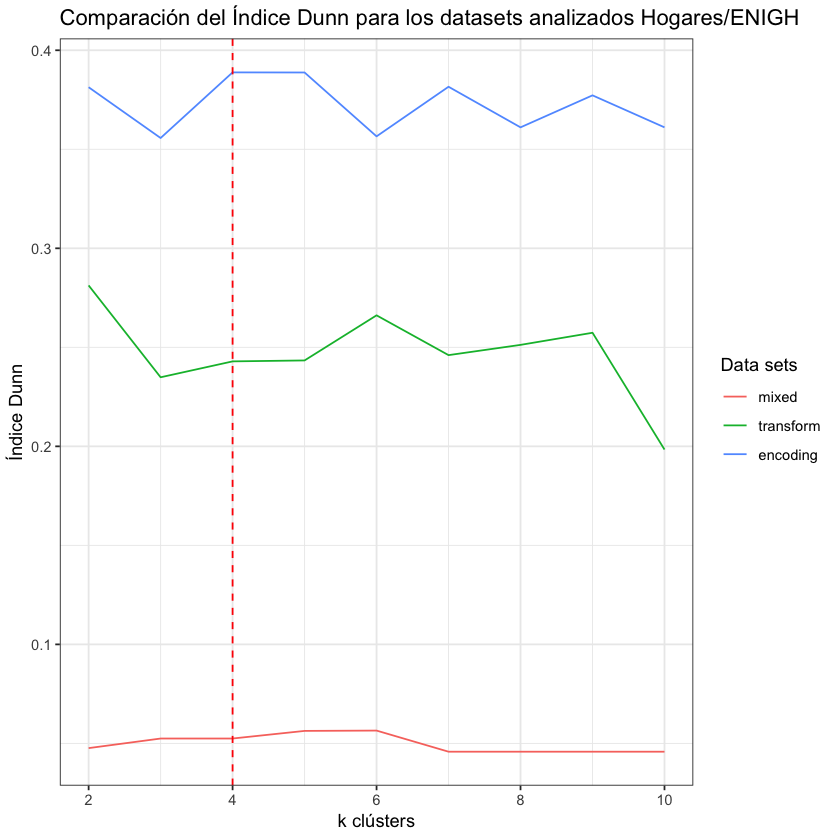

In [112]:
require(ggplot2)
require(reshape2)

df <- data.frame(k = 2:10,
                 "mixed" = dunn$dunn_og,
                 "transform"= dunn$dunn_transform,
                 "encoding"= dunn$dunn_encoding)

df <- melt(df ,  id.vars = 'k', variable.name = 'dunn')

# plot on same grid, each series colored differently -- 
# good if the series have same scale
ggplot(df, aes(k,value)) + 
geom_line(aes(colour = dunn)) + 
theme_bw() +
geom_vline(xintercept = df$k[which.max(df$value)], linetype = 2, color='red')+
labs(title = "Comparación del Índice Dunn para los datasets analizados Hogares/ENIGH", 
     x = "k clústers", 
     y = "Índice Dunn",
     color = "Data sets")+
ggsave(filename = "../../../../../../images/enigh/HOGARES/dunn_compar.png", dpi = 300)


